In [1]:
%config InlineBackend.figure_formats = ['retina']

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [3]:
oscars_df.columns

Index(['Unnamed: 0', 'IMDBId', 'movie title', 'language', 'country',
       'runtime (mins)', 'mpaarating', 'metacritic score', 'budget',
       'distributionCompany',
       ...
       'Writer_Aaron Sorkin', 'Writer_Joel Coen', 'Writer_John Logan',
       'Writer_Lawrence Kasdan', 'Writer_Paul Thomas Anderson',
       'Writer_Pedro Almodóvar', 'Writer_Peter Morgan',
       'Writer_Quentin Tarantino', 'Writer_William Shakespeare',
       'Writer_Woody Allen'],
      dtype='object', length=109)

In [4]:
oscars_df.drop_duplicates(subset='IMDBId',inplace=True)
oscars_df.drop(columns = 'Unnamed: 0',inplace=True)

In [5]:
top_ten = oscars_df['writer1'].value_counts().iloc[:5]
mask = oscars_df['writer1'].isin(top_ten.index)
top_writers = oscars_df['writer1'][mask]

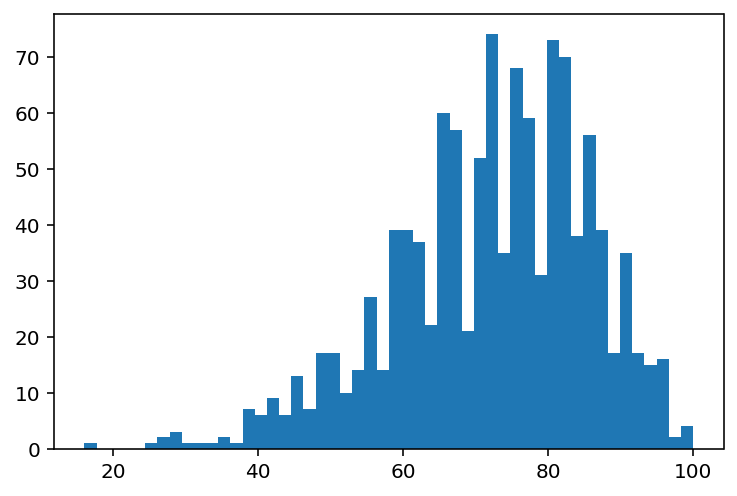

In [12]:
plt.hist(oscars_df["metacritic score"],bins=50);

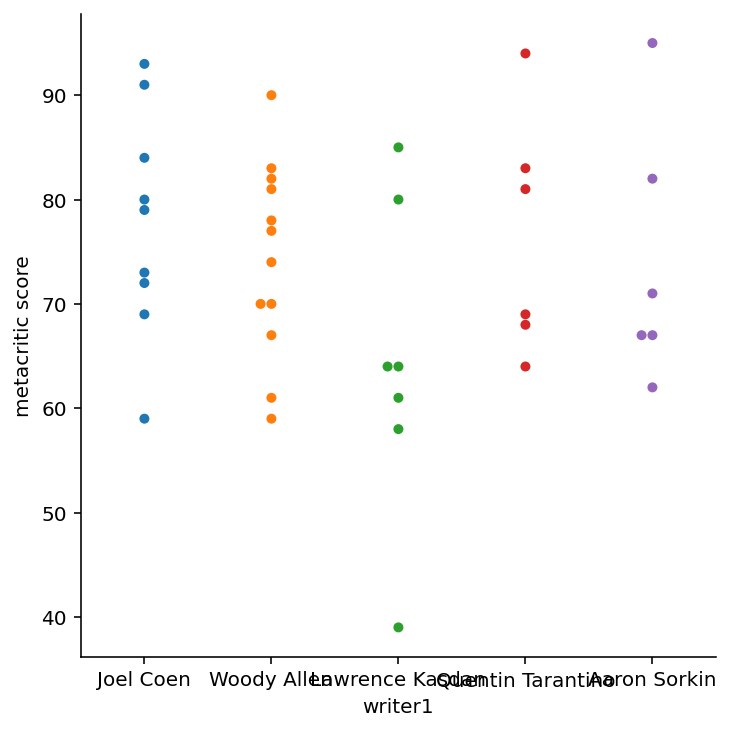

In [6]:
sns.catplot(data=oscars_df, kind="swarm", x=top_writers, y="metacritic score")

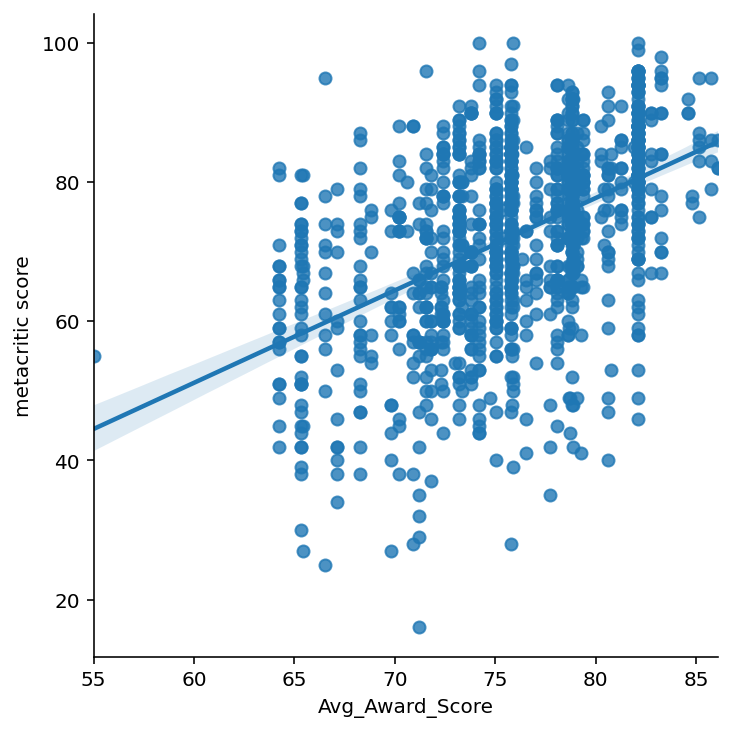

In [7]:
sns.lmplot(x="Avg_Award_Score", y="metacritic score", data=oscars_df)

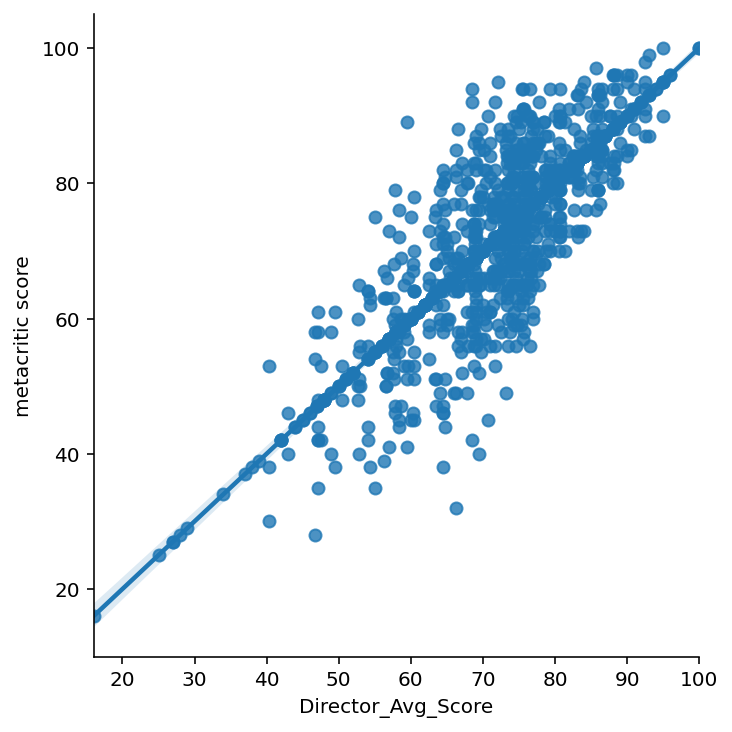

In [8]:
sns.lmplot(x="Director_Avg_Score", y="metacritic score", data=oscars_df)

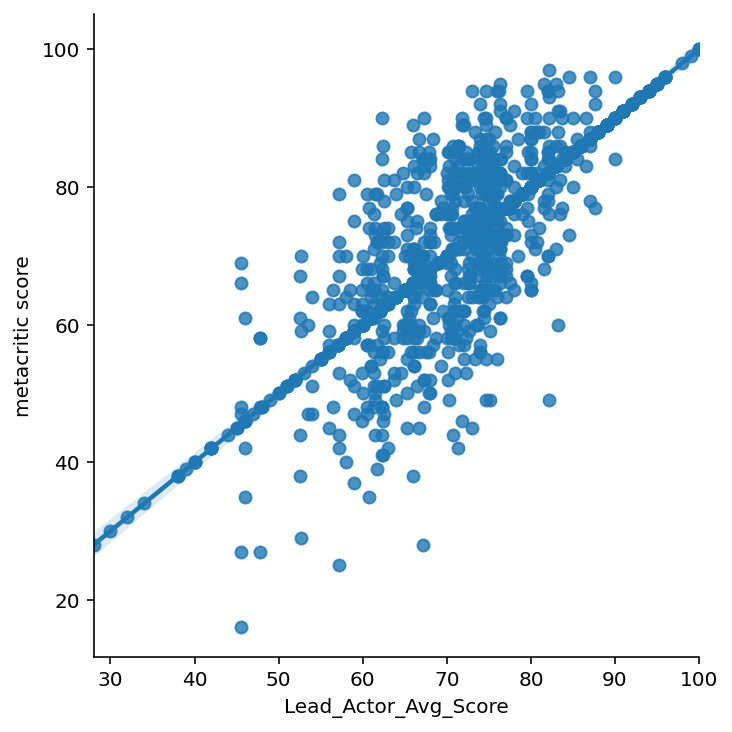

In [9]:
sns.lmplot(x="Lead_Actor_Avg_Score", y="metacritic score", data=oscars_df)